In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from pycaret.regression import *
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import mean_absolute_error, r2_score
df_NACA5 = pd.read_csv("data/df_NACA5.csv")
df_NACA5.head(5)

,No.,Airfoil_ID,L,P,Q,XX,Re,U,AOA,Ux,Uy,Name,Fx,Fy,Drag,Lift
0,201,Airfoil_05,3.993,7.922,0.0,18.535,5.550272e+06,86.584242,-4.823651,86.277581,-7.280798,Fengbo,0.003820,-0.074235,0.010049,-0.073651
1,202,Airfoil_05,3.993,7.922,0.0,18.535,4.633582e+06,72.283880,-2.352043,72.222983,-2.966485,Fengbo,0.017542,0.177398,0.010247,0.177968
2,203,Airfoil_05,3.993,7.922,0.0,18.535,2.397422e+06,37.399786,0.403553,37.398859,0.263417,Fengbo,0.008877,0.445053,0.012012,0.444979
3,204,Airfoil_05,3.993,7.922,0.0,18.535,2.820286e+06,43.996463,6.705231,43.695527,5.137089,Fengbo,-0.105816,1.041214,0.016481,1.046447
4,205,Airfoil_05,3.993,7.922,0.0,18.535,2.708033e+06,42.245309,-0.733028,42.241852,-0.540461,Fengbo,0.015714,0.333058,0.011451,0.333231


In [2]:
def split_data(df):
    df = df.sample(frac = 1, random_state = 0)
    train  = df.head(0)
    test = df.head(0)
    for ID in set(df['Airfoil_ID']):
        df_tmp = df[df['Airfoil_ID']==ID]
        N = int(len(df_tmp)*0.9)
        train = pd.concat([train,df_tmp.iloc[:N]])
        test = pd.concat([test,df_tmp.iloc[N:]])
    train_df = train.reset_index(drop=True)
    test_df = test.reset_index(drop=True)
    return train_df, test_df

In [3]:
train_df, test_df = split_data(df_NACA5)
train_df.head(5)

,No.,Airfoil_ID,L,P,Q,XX,Re,U,AOA,Ux,Uy,Name,Fx,Fy,Drag,Lift
0,509,Airfoil_11,1.995,6.673,1.0,9.514,2.631198e+06,41.046692,12.776004,40.030461,9.077069,Ayato,-0.307873,1.448893,0.020158,1.481104
1,519,Airfoil_11,1.995,6.673,1.0,9.514,4.218391e+06,65.806901,-0.100840,65.806799,-0.115819,Ayato,0.008480,0.192130,0.008142,0.192145
2,525,Airfoil_11,1.995,6.673,1.0,9.514,2.787229e+06,43.480778,8.359820,43.018775,6.321638,Ayato,-0.145827,1.079751,0.012707,1.089480
3,503,Airfoil_11,1.995,6.673,1.0,9.514,3.545786e+06,55.314269,14.667636,53.511629,14.006211,Ayato,-0.385096,1.570407,0.025099,1.616740
4,545,Airfoil_11,1.995,6.673,1.0,9.514,2.105561e+06,32.846747,8.763679,32.463266,5.004509,Ayato,-0.157505,1.112119,0.013776,1.123133


In [4]:
test_df.head(5)

,No.,Airfoil_ID,L,P,Q,XX,Re,U,AOA,Ux,Uy,Name,Fx,Fy,Drag,Lift
0,529,Airfoil_11,1.995,6.673,1.0,9.514,4.850219e+06,75.663418,-4.890958,75.387910,-6.451040,Ayato,-0.019875,-0.333279,0.008613,-0.333760
1,528,Airfoil_11,1.995,6.673,1.0,9.514,3.343248e+06,52.154662,-2.209394,52.115891,-2.010648,Ayato,0.006938,-0.040428,0.008491,-0.040130
2,548,Airfoil_11,1.995,6.673,1.0,9.514,2.028714e+06,31.647941,6.031626,31.472739,3.325484,Ayato,-0.077705,0.843690,0.011378,0.847184
3,516,Airfoil_11,1.995,6.673,1.0,9.514,4.956651e+06,77.323752,11.795080,75.691056,15.805902,Ayato,-0.275830,1.398975,0.015961,1.425819
4,518,Airfoil_11,1.995,6.673,1.0,9.514,5.805320e+06,90.562998,-0.624424,90.557620,-0.986959,Ayato,0.009167,0.135222,0.007693,0.135314


In [5]:
def compare(df, use_cols, target):
    exp = setup(
        data = df[use_cols + [target]],
        target = target,
        numeric_features = use_cols,
        session_id = 42,
        normalize = True, 
        transformation = False,   
        verbose = False
        )
    compare_models()

In [6]:
def predict(train_df, test_df, use_cols, target, model_name):
    exp = setup(
        data=train_df[use_cols + [target]],
        target=target,
        numeric_features=use_cols,
        session_id=42,
        normalize=True, 
        transformation=False,   
        verbose=False
        )
    model = create_model(model_name)
    plot_model(model, plot='error')
    final_model = finalize_model(model)
    plot_model(model, plot='feature')
    result = predict_model(final_model, data = test_df[use_cols])
    return result["prediction_label"]

In [7]:
target = 'Drag'
use_cols = ['L', 'P', 'Q', 'XX', 'Re', 'AOA']
compare(df_NACA5, use_cols, target)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0006,0.0000,0.0014,0.9506,0.0013,0.0314,0.0180
gbr,Gradient Boosting Regressor,0.0010,0.0000,0.0023,0.8764,0.0022,0.0594,0.0130
lightgbm,Light Gradient Boosting Machine,0.0012,0.0000,0.0024,0.8689,0.0023,0.0734,0.3700
rf,Random Forest Regressor,0.0010,0.0000,0.0024,0.8677,0.0023,0.0619,0.0280
ada,AdaBoost Regressor,0.0022,0.0000,0.0030,0.7851,0.0030,0.1658,0.0120
knn,K Neighbors Regressor,0.0015,0.0000,0.0032,0.7817,0.0031,0.0810,0.0060
dt,Decision Tree Regressor,0.0012,0.0000,0.0032,0.5817,0.0031,0.0735,0.0050
huber,Huber Regressor,0.0027,0.0000,0.0052,0.4288,0.0051,0.1530,0.0050
br,Bayesian Ridge,0.0032,0.0000,0.0051,0.4229,0.0050,0.2191,0.0050
ridge,Ridge Regression,0.0032,0.0000,0.0051,0.4207,0.0050,0.2207,0.0050


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0004,0.0000,0.0010,0.9888,0.0009,0.0189
1,0.0011,0.0000,0.0031,0.8435,0.0030,0.0557
2,0.0004,0.0000,0.0006,0.9931,0.0006,0.0235
3,0.0006,0.0000,0.0016,0.9505,0.0015,0.0301
4,0.0004,0.0000,0.0006,0.9852,0.0006,0.0259
5,0.0007,0.0000,0.0018,0.9559,0.0017,0.0331
6,0.0007,0.0000,0.0015,0.9664,0.0014,0.0320
7,0.0005,0.0000,0.0007,0.9692,0.0007,0.0308
8,0.0004,0.0000,0.0007,0.9917,0.0006,0.0245


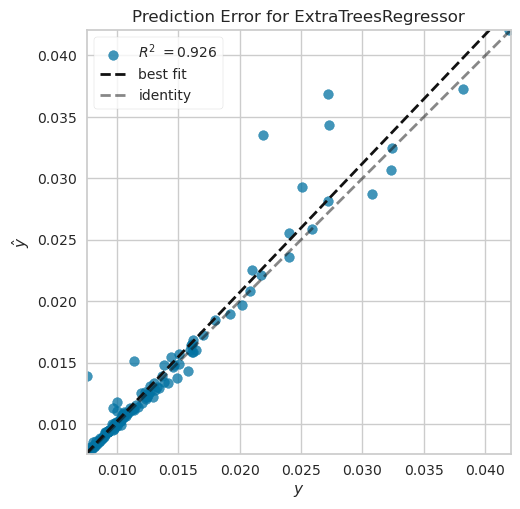

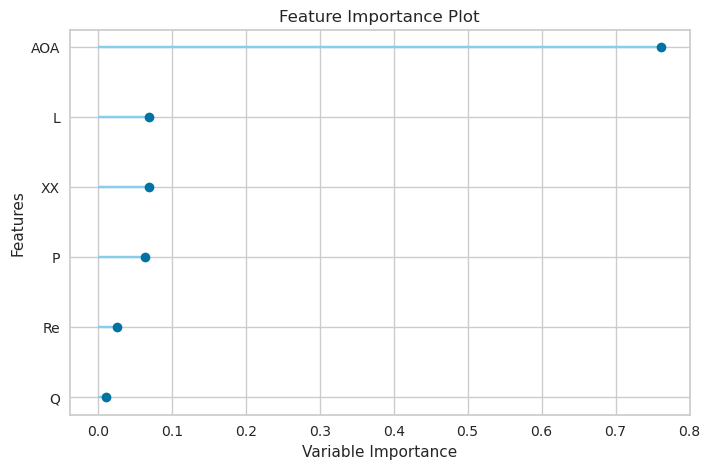

MAE = 0.0003950903701865846
R2  = 0.9882921357048824


In [8]:
model_name = 'et'
y_pred = predict(train_df, test_df, use_cols, target, model_name)
y_true = test_df[target]
print("MAE =", mean_absolute_error(y_true, y_pred))
print("R2  =", r2_score(y_true, y_pred))

In [ ]:
target = 'Lift'
compare(df_NACA5, use_cols, target)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:20:44
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Huber Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0405,0.0033,0.0561,0.9891,0.0310,0.2285,0.0050
ridge,Ridge Regression,0.0409,0.0033,0.0562,0.9891,0.0313,0.2487,0.0050
lar,Least Angle Regression,0.0405,0.0033,0.0561,0.9891,0.0310,0.2285,0.0050
br,Bayesian Ridge,0.0405,0.0033,0.0561,0.9891,0.0310,0.2297,0.0050
par,Passive Aggressive Regressor,0.0575,0.0047,0.0682,0.9842,0.0381,0.4627,0.0050
omp,Orthogonal Matching Pursuit,0.0835,0.0102,0.1002,0.9657,0.0645,0.8276,0.0050
en,Elastic Net,0.4532,0.2786,0.5256,0.0877,0.2715,7.4133,0.0050
lasso,Lasso Regression,0.4801,0.3125,0.5569,-0.0249,0.2896,7.8638,0.0050
llar,Lasso Least Angle Regression,0.4801,0.3125,0.5569,-0.0249,0.2896,7.8638,0.0050


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [ ]:
model_name = 'et'
y_pred = predict(train_df, test_df, use_cols, target, model_name)
y_true = test_df[target]
print("MAE =", mean_absolute_error(y_true, y_pred))
print("R2  =", r2_score(y_true, y_pred))